<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вариант 11

## Задача:
  Управление качеством продукции на производственном предприятии
## Суть задачи:
Система управления должна контролировать качество продукции на каждом этапе
производства и принимать решения о необходимости корректировок в процессе, чтобы
минимизировать количество бракованных изделий. Цель — поддерживать высокое качество
продукции и сократить затраты на возвраты и переработку.
## Условия:
1. Если уровень дефектов высок и скорость производства высокая, необходимо снизить
скорость или провести дополнительный контроль качества.
2. Если уровень дефектов низкий и скорость производства низкая, можно увеличить скорость
производства.
3. Если уровень дефектов средний, необходимо провести дополнительную проверку, чтобы
выявить причины.
4. Если уровень дефектов очень высокий, следует остановить производство для анализа и
корректировок.


Входные переменные:
1. Уровень дефектов (defect rate):
• Низкий (Low)
• Средний (Medium)
• Высокий (High)
• Очень высокий (Very High)
2. Скорость производства (production speed):
• Низкая (Low)
• Средняя (Medium)
• Высокая (High)


Выходная переменная:
1. Корректировка процесса (process adjustment):
• Уменьшить скорость (Reduce Speed)
• Поддерживать скорость (Maintain Speed)
• Увеличить скорость (Increase Speed)
• Остановить производство (Stop Production)


Пример правил:
1. Если уровень дефектов очень высокий и скорость производства высокая, необходимо
остановить производство.
2. Если уровень дефектов высокий и скорость производства высокая, следует уменьшить
скорость.
3. Если уровень дефектов низкий и скорость производства низкая, можно увеличить скорость.
4. Если уровень дефектов средний, необходимо поддерживать текущую скорость и провести
дополнительный контроль.

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [3]:
defect_rate = ctrl.Antecedent( np.arange(0, 101, 1), "Уровень дефектов" )
production_speed = ctrl.Antecedent( np.arange(0, 101, 1), "Скорость производства" )
proc_adjustment = ctrl.Consequent( np.arange(0, 101, 1), "Корректировка процесса" )

In [111]:
# Треугольная функция
defect_rate['Низкий'] = fuz.trimf(defect_rate.universe, [0, 0, 15])
defect_rate['Средний'] = fuz.trimf(defect_rate.universe, [10, 20, 30])
defect_rate['Высокий'] = fuz.trimf(defect_rate.universe, [25, 37.5, 50])
defect_rate['Очень высокий'] = fuz.trimf(defect_rate.universe, [45, 100, 100])

production_speed['Низкая'] = fuz.trimf(production_speed.universe, [0, 0, 50])
production_speed['Средняя'] = fuz.trimf(production_speed.universe, [0, 50, 100])
production_speed['Высокая'] = fuz.trimf(production_speed.universe, [50, 100, 100])

proc_adjustment['Увеличить скорость'] = fuz.trimf(proc_adjustment.universe, [0, 0, 25])
proc_adjustment['Поддерживать скорость'] = fuz.trimf(proc_adjustment.universe, [20, 30, 40])
proc_adjustment['Уменьшить скорость'] = fuz.trimf(proc_adjustment.universe, [35, 52.5, 70])
proc_adjustment['Остановить производство'] = fuz.trimf(proc_adjustment.universe, [65, 100, 100])

In [38]:
# Трапециевидная
defect_rate['Низкий'] = fuz.trapmf(defect_rate.universe, [0, 0, 7, 15])
defect_rate['Средний'] = fuz.trapmf(defect_rate.universe, [9, 12, 20, 25])
defect_rate['Высокий'] = fuz.trapmf(defect_rate.universe, [20, 25, 40, 50])
defect_rate['Очень высокий'] = fuz.trapmf(defect_rate.universe, [45, 75, 100, 100])

production_speed['Низкая'] = fuz.trapmf(production_speed.universe, [0, 5, 40, 50])
production_speed['Средняя'] = fuz.trapmf(production_speed.universe, [10, 40, 70, 100])
production_speed['Высокая'] = fuz.trapmf(production_speed.universe, [65, 75, 100, 100])

proc_adjustment['Увеличить скорость'] = fuz.trapmf(proc_adjustment.universe, [0, 0, 15, 25])
proc_adjustment['Поддерживать скорость'] = fuz.trapmf(proc_adjustment.universe, [20, 25, 35, 40])
proc_adjustment['Уменьшить скорость'] = fuz.trapmf(proc_adjustment.universe, [35, 40, 60, 70])
proc_adjustment['Остановить производство'] = fuz.trapmf(proc_adjustment.universe, [65, 85, 100, 100])

In [101]:
# Гаусса
defect_rate['Низкий'] = fuz.gaussmf(defect_rate.universe, mean = 0, sigma = 5)
defect_rate['Средний'] = fuz.gaussmf(defect_rate.universe, mean = 15, sigma = 10)
defect_rate['Высокий'] = fuz.gaussmf(defect_rate.universe, mean = 35, sigma = 10)
defect_rate['Очень высокий'] = fuz.gaussmf(defect_rate.universe, mean = 80, sigma = 20)

production_speed['Низкая'] = fuz.gaussmf(production_speed.universe, mean = 25, sigma = 15)
production_speed['Средняя'] = fuz.gaussmf(production_speed.universe, mean = 50, sigma = 15)
production_speed['Высокая'] = fuz.gaussmf(production_speed.universe, mean = 75, sigma = 15)

proc_adjustment['Увеличить скорость'] = fuz.gaussmf(proc_adjustment.universe, mean = 0, sigma = 8)
proc_adjustment['Поддерживать скорость'] = fuz.gaussmf(proc_adjustment.universe, mean = 20, sigma = 10)
proc_adjustment['Уменьшить скорость'] = fuz.gaussmf(proc_adjustment.universe, mean = 50, sigma = 12)
proc_adjustment['Остановить производство'] = fuz.gaussmf(proc_adjustment.universe, mean = 80, sigma = 15)

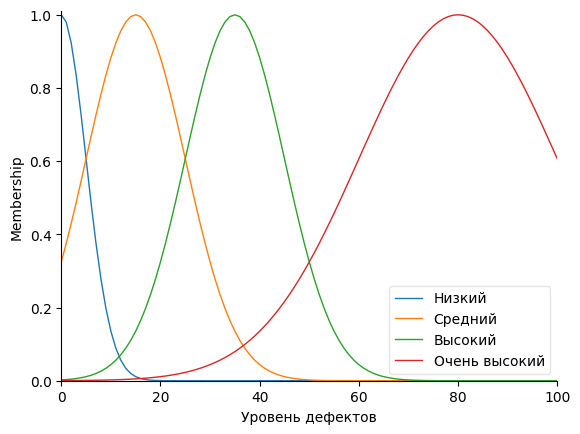

In [79]:
defect_rate.view()

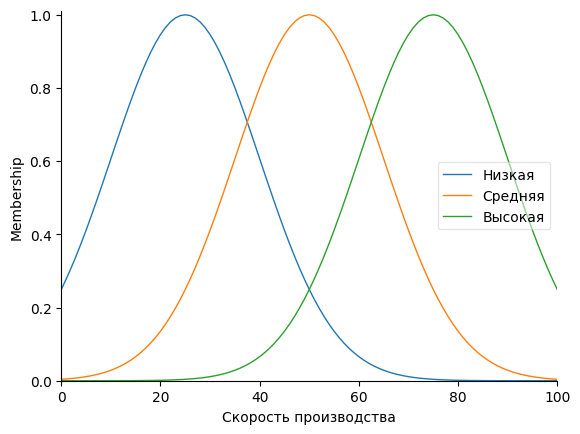

In [80]:
production_speed.view()

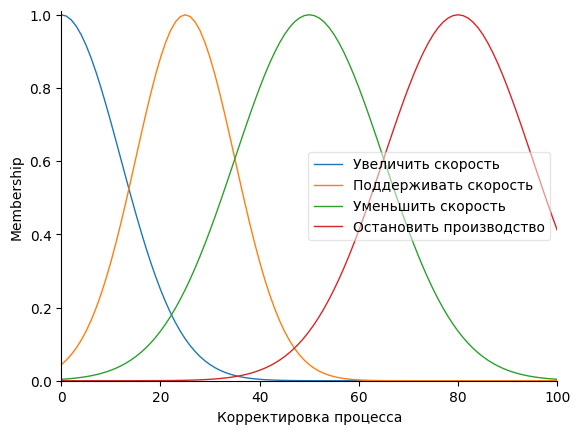

In [83]:
proc_adjustment.view()

In [112]:
rule1 = ctrl.Rule(defect_rate['Очень высокий'] & production_speed['Высокая'], proc_adjustment['Остановить производство'])
rule2 = ctrl.Rule(defect_rate['Высокий'] & production_speed['Высокая'], proc_adjustment['Уменьшить скорость'])
rule3 = ctrl.Rule(defect_rate['Низкий'] & production_speed['Низкая'], proc_adjustment['Увеличить скорость'])
rule4 = ctrl.Rule(defect_rate['Средний'] & production_speed['Высокая'], proc_adjustment['Поддерживать скорость'])
rule5 = ctrl.Rule(defect_rate['Средний'] & production_speed['Низкая'], proc_adjustment['Поддерживать скорость'])
rule6 = ctrl.Rule(defect_rate['Средний'] & production_speed['Средняя'], proc_adjustment['Поддерживать скорость'])
rule7 = ctrl.Rule(defect_rate['Высокий'] & production_speed['Низкая'], proc_adjustment['Остановить производство'])
rule8 = ctrl.Rule(defect_rate['Низкий'] & production_speed['Высокая'], proc_adjustment['Поддерживать скорость'])
rule9 = ctrl.Rule(defect_rate['Очень высокий'] & production_speed['Низкая'], proc_adjustment['Остановить производство'])
rule10 = ctrl.Rule(defect_rate['Высокий'] & production_speed['Средняя'], proc_adjustment['Остановить производство'])
rule11 = ctrl.Rule(defect_rate['Очень высокий'] & production_speed['Средняя'], proc_adjustment['Остановить производство'])


In [113]:
prod_ctrl = ctrl.ControlSystem( [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11] )
production = ctrl.ControlSystemSimulation(prod_ctrl)

In [114]:
production.input["Скорость производства"] = 50
production.input["Уровень дефектов"] = 20

In [115]:
production.compute()

In [116]:
print(f"Контроль: { production.output['Корректировка процесса']:.2f} %")


Контроль: 30.00 %


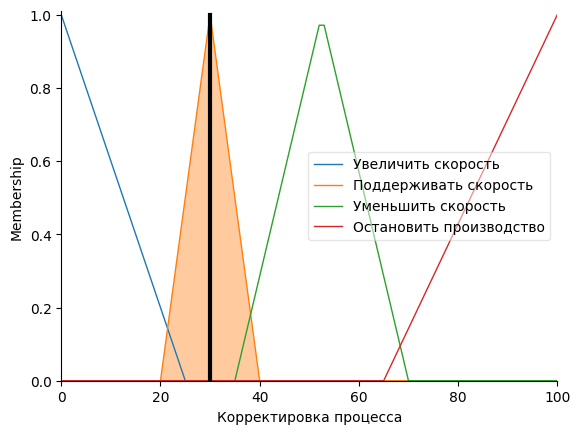

In [117]:
proc_adjustment.view(sim=production)